# Declaration of Originality

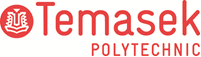

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : HA TIN HUY (2404043H)
* Tutorial Group                :  PC04
* Tutor						    :  MR EMILE
* Submission Date               : 11/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding

Real World Problem:
The banking industry faces a critical challenge: Customer Attrition (Churn). It is estimated that acquiring a new customer is 5 to 7 times more expensive than retaining an existing one. In our current dataset, we see a significant portion of the customer base leaving the bank, resulting in:

1. Direct Revenue Loss: Immediate loss of account balances and transaction fees.

2. Sunk Costs: Marketing and onboarding budgets spent on acquired customers are never recovered if they churn within the first 24 months.

3. Lost Opportunity: Churned customers take future high-value products (mortgages, personal loans, and insurance) to competitors.

4. Geographic & Demographic Vulnerability: Specific segments—such as customers in Germany or those with 3+ products—are showing higher-than-average exit rates, indicating potential service friction or aggressive competitor poaching in those areas.


Goal:
The primary objective of this project is to transition the bank from a reactive retention strategy to a proactive, data-driven one. Specifically,  aiming to:

1. Predict High-Risk Customers: Build a Machine Learning model that identifies "at-risk" individuals before they close their accounts.

2. Maximize Recall: Prioritize catching as many potential churners as possible, while keeping accuracy high.

3. Identify Churn Drivers: Use Feature Importance to understand why customers leave

4. Deploy an Early Warning System: Provide a Streamlit-based interface for Relationship Managers to input customer data and receive instant risk scores and actionable retention recommendations.

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
# Read the file from your 'archive' folder
df = pd.read_csv('archive/Churn_Modelling.csv')

%matplotlib inline

print(f"Loaded: {df.shape[0]} rows, {df.shape[1]} cols")
df.head()

Loaded: 10000 rows, 14 cols


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2.2 Summary Statistics

In [3]:
# Check data types and for missing values (Non-Null Count)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:

# Get a statistical overview of numerical columns
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

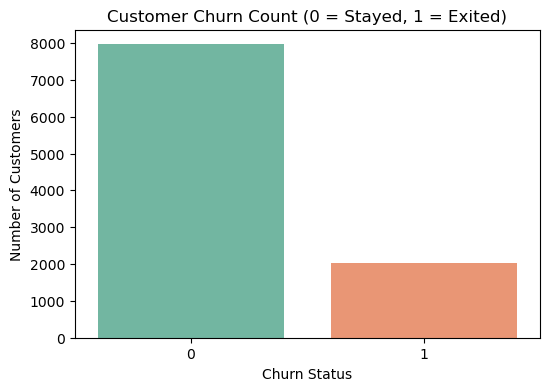

In [5]:
## Understanding distribution of target
# Create a count plot for the target variable 'Exited'
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, hue='Exited', palette='Set2', legend=False)

# Adding meaningful titles and labels for the presentation
plt.title('Customer Churn Count (0 = Stayed, 1 = Exited)')
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

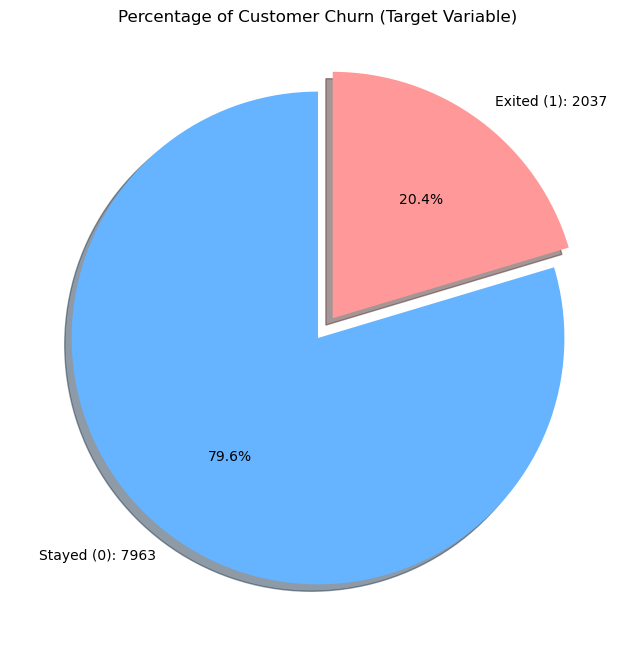

In [6]:
# Check class balance with a pie chart
plt.figure(figsize=(8, 8))

# Define labels and counts
counts = df['Exited'].value_counts()
labels = [f'Stayed (0): {counts[0]}', f'Exited (1): {counts[1]}']

# Plotting the data
plt.pie(
    counts, 
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    shadow=True, 
    colors=['#66b3ff','#ff9999'],
    labels=labels,
    startangle=90
)

plt.title('Percentage of Customer Churn (Target Variable)')
plt.show()

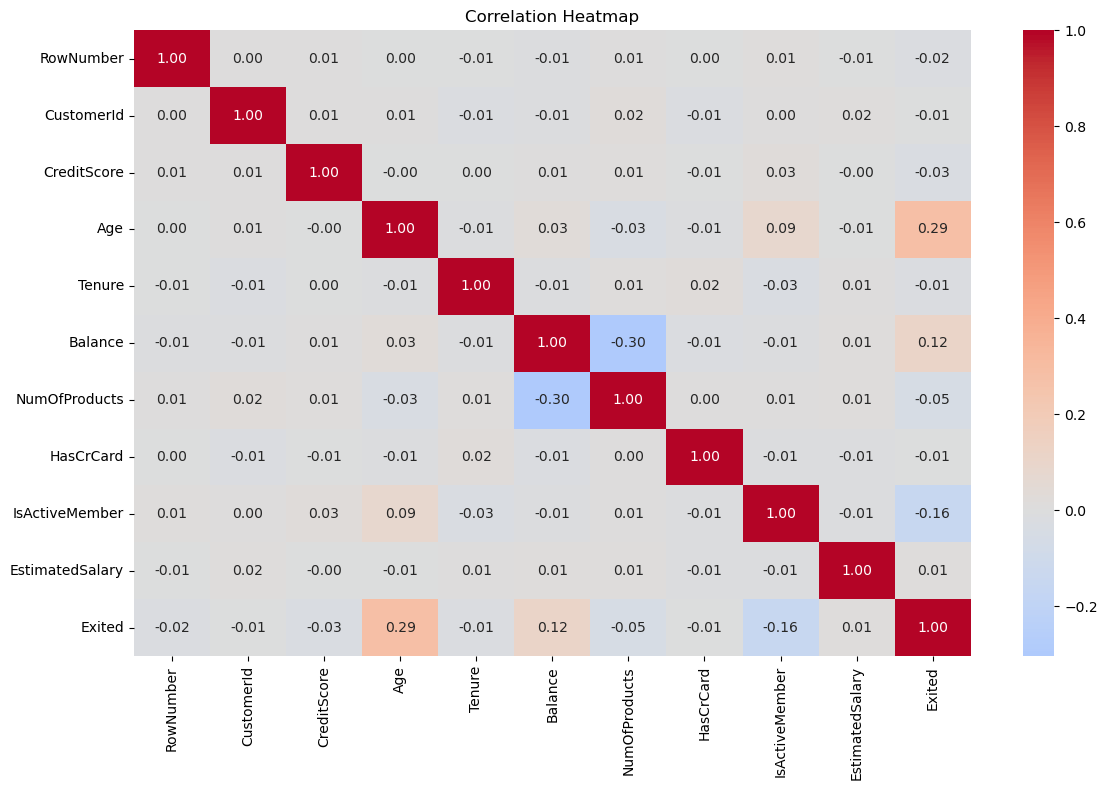

Key correlations with churn:
Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64


In [7]:
# Correlation heatmap
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
print("Key correlations with churn:")
print(corr['Exited'].sort_values(ascending=False))

## Comments
 The correlation heatmap shows that no single feature has a "strong" linear relationship (above 0.5) with the target variable Exited. The highest positive correlation is Age (\approx 0.28), and the highest negative correlation is IsActiveMember (\approx -0.16).
 
 This lack of strong linear correlation suggests that churn is a multi-faceted problem where features interact in non-linear ways. This discovery justifies my choice to experiment with non-linear algorithms like Random Forest rather than relying solely on simple linear models, as they are better equipped to capture the complex, overlapping signals that lead to customer churn.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_83612\1192249358.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=import_df.head(10), x='importance', y='feature', palette='viridis')


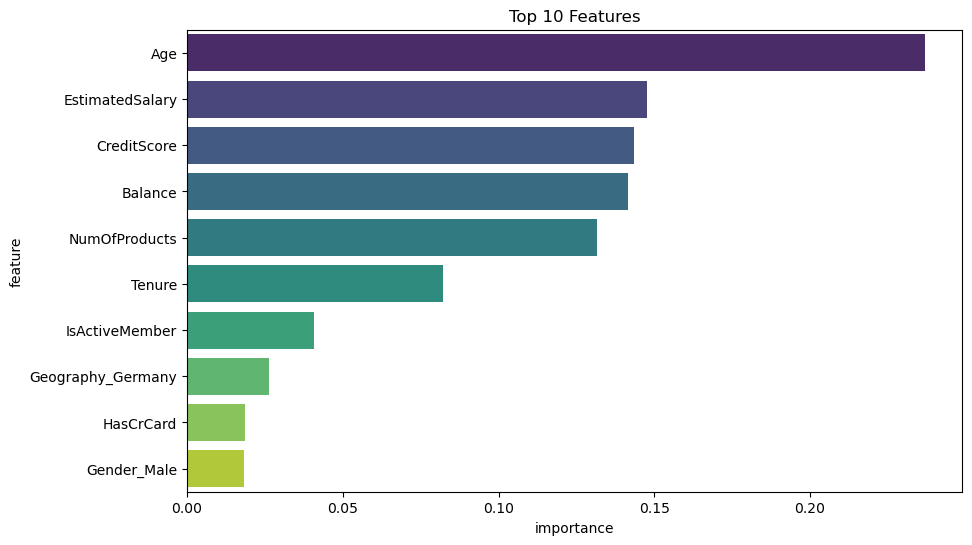

              feature  importance
1                 Age    0.236922
7     EstimatedSalary    0.147558
0         CreditScore    0.143338
3             Balance    0.141612
4       NumOfProducts    0.131486
2              Tenure    0.082080
6      IsActiveMember    0.040725
8   Geography_Germany    0.026190
5           HasCrCard    0.018454
10        Gender_Male    0.018421


In [8]:
# Feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_temp = df.drop(['Exited','RowNumber','CustomerId','Surname'], axis=1)
y_temp = df['Exited']
X_temp = pd.get_dummies(X_temp, columns=['Geography','Gender'], drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
import_df = pd.DataFrame({'feature':X_temp.columns, 'importance':rf.feature_importances_}).sort_values('importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=import_df.head(10), x='importance', y='feature', palette='viridis')
plt.title('Top 10 Features')
plt.show()
print(import_df.head(10))

### Observation:
The pie chart reveals a significant Class Imbalance. Approximately 20.4% of customers (2037) have exited, while 79.6% (7963) have remained with the bank.

- Age (0.29): The strongest positive correlation, suggesting that older customers are more likely to exit.

- Balance (0.12): Higher account balances are associated with an increased likelihood of churn, marking these as high-value losses.

- IsActiveMember (-0.16): A notable negative correlation, confirming that lack of engagement is a primary red flag for churn.

- NumOfProducts (-0.05): A slight negative correlation, indicating that as customers adopt more products, their stickiness to the bank generally increases.

### Rationale for Action:
Despite having such a big difference, I have chosen to work with this imbalanced data. Even though this almost 80/20 split represents the true operational environment of the bank. I strongly believe that if the model trains on a realistic distribution, it will be more robust when deployed.

If I were to undersample to reach 50/50, I would be throwing away valuable data from 6,000 customers who stayed. So to prevent the model from becoming biased toward the majority class, I will use scikit-learn’s built-in class_weight='balanced' parameter during the modeling phase. This instructs the algorithm to penalize mistakes on the "Exited" group more heavily.

I will prioritize Recall to catch the maximum number of churners and the F1-Score to balance precision and recall, rather than put all my focus just accuracy. For the Early Warning System, it is much more costly to miss a 'False Negative' than a 'False Positive'

### 2.3.1.2 Understanding distribution of features

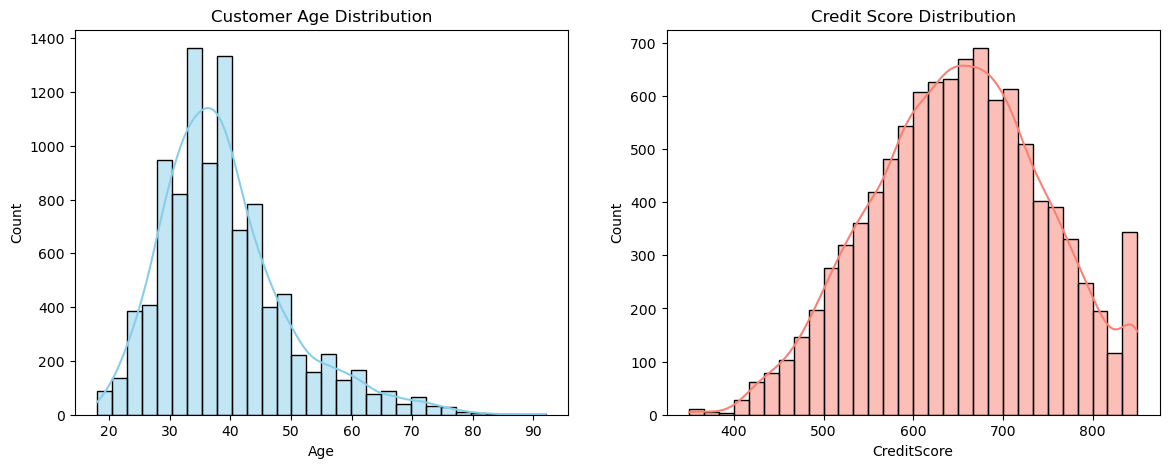

In [9]:
## Understanding distribution of features
plt.figure(figsize=(14, 5))

# Chart 1: Age - Is the bank mainly targeted towards young people or seniors?
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Customer Age Distribution')

# Chart 2: Credit Score - Are the customers financially healthy?
plt.subplot(1, 2, 2)
sns.histplot(df['CreditScore'], bins=30, kde=True, color='salmon')
plt.title('Credit Score Distribution')

plt.show()


## Thought Process & Data Analysis: Feature Distribution

### Analysis of Customer Age Distribution:
Observation: The age distribution follows a slightly right-skewed normal distribution, with a heavy concentration of customers in the 30 to 45 age bracket.

Business Insight: Our primary customer base consists of working-age adults. We need to investigate if churn is higher among the younger demographic (early career) or older demographic (retirement planning), as their banking needs differ significantly.

### Analysis of Credit Score Distribution:
Observation: Most customers have a credit score between 600 and 700, showing a financially healthy population. There is a visible spike at the maximum credit score (850), indicating a segment of "perfect-score" elite customers.

Business Insight: The bank attracts high-value, low-risk individuals. As a founder, identifying if the top-tier credit score holders are leaving is vital, as losing these customers represents a significant loss in potential loan revenue and trust.

### 2.3.2 Understanding relationship between variables

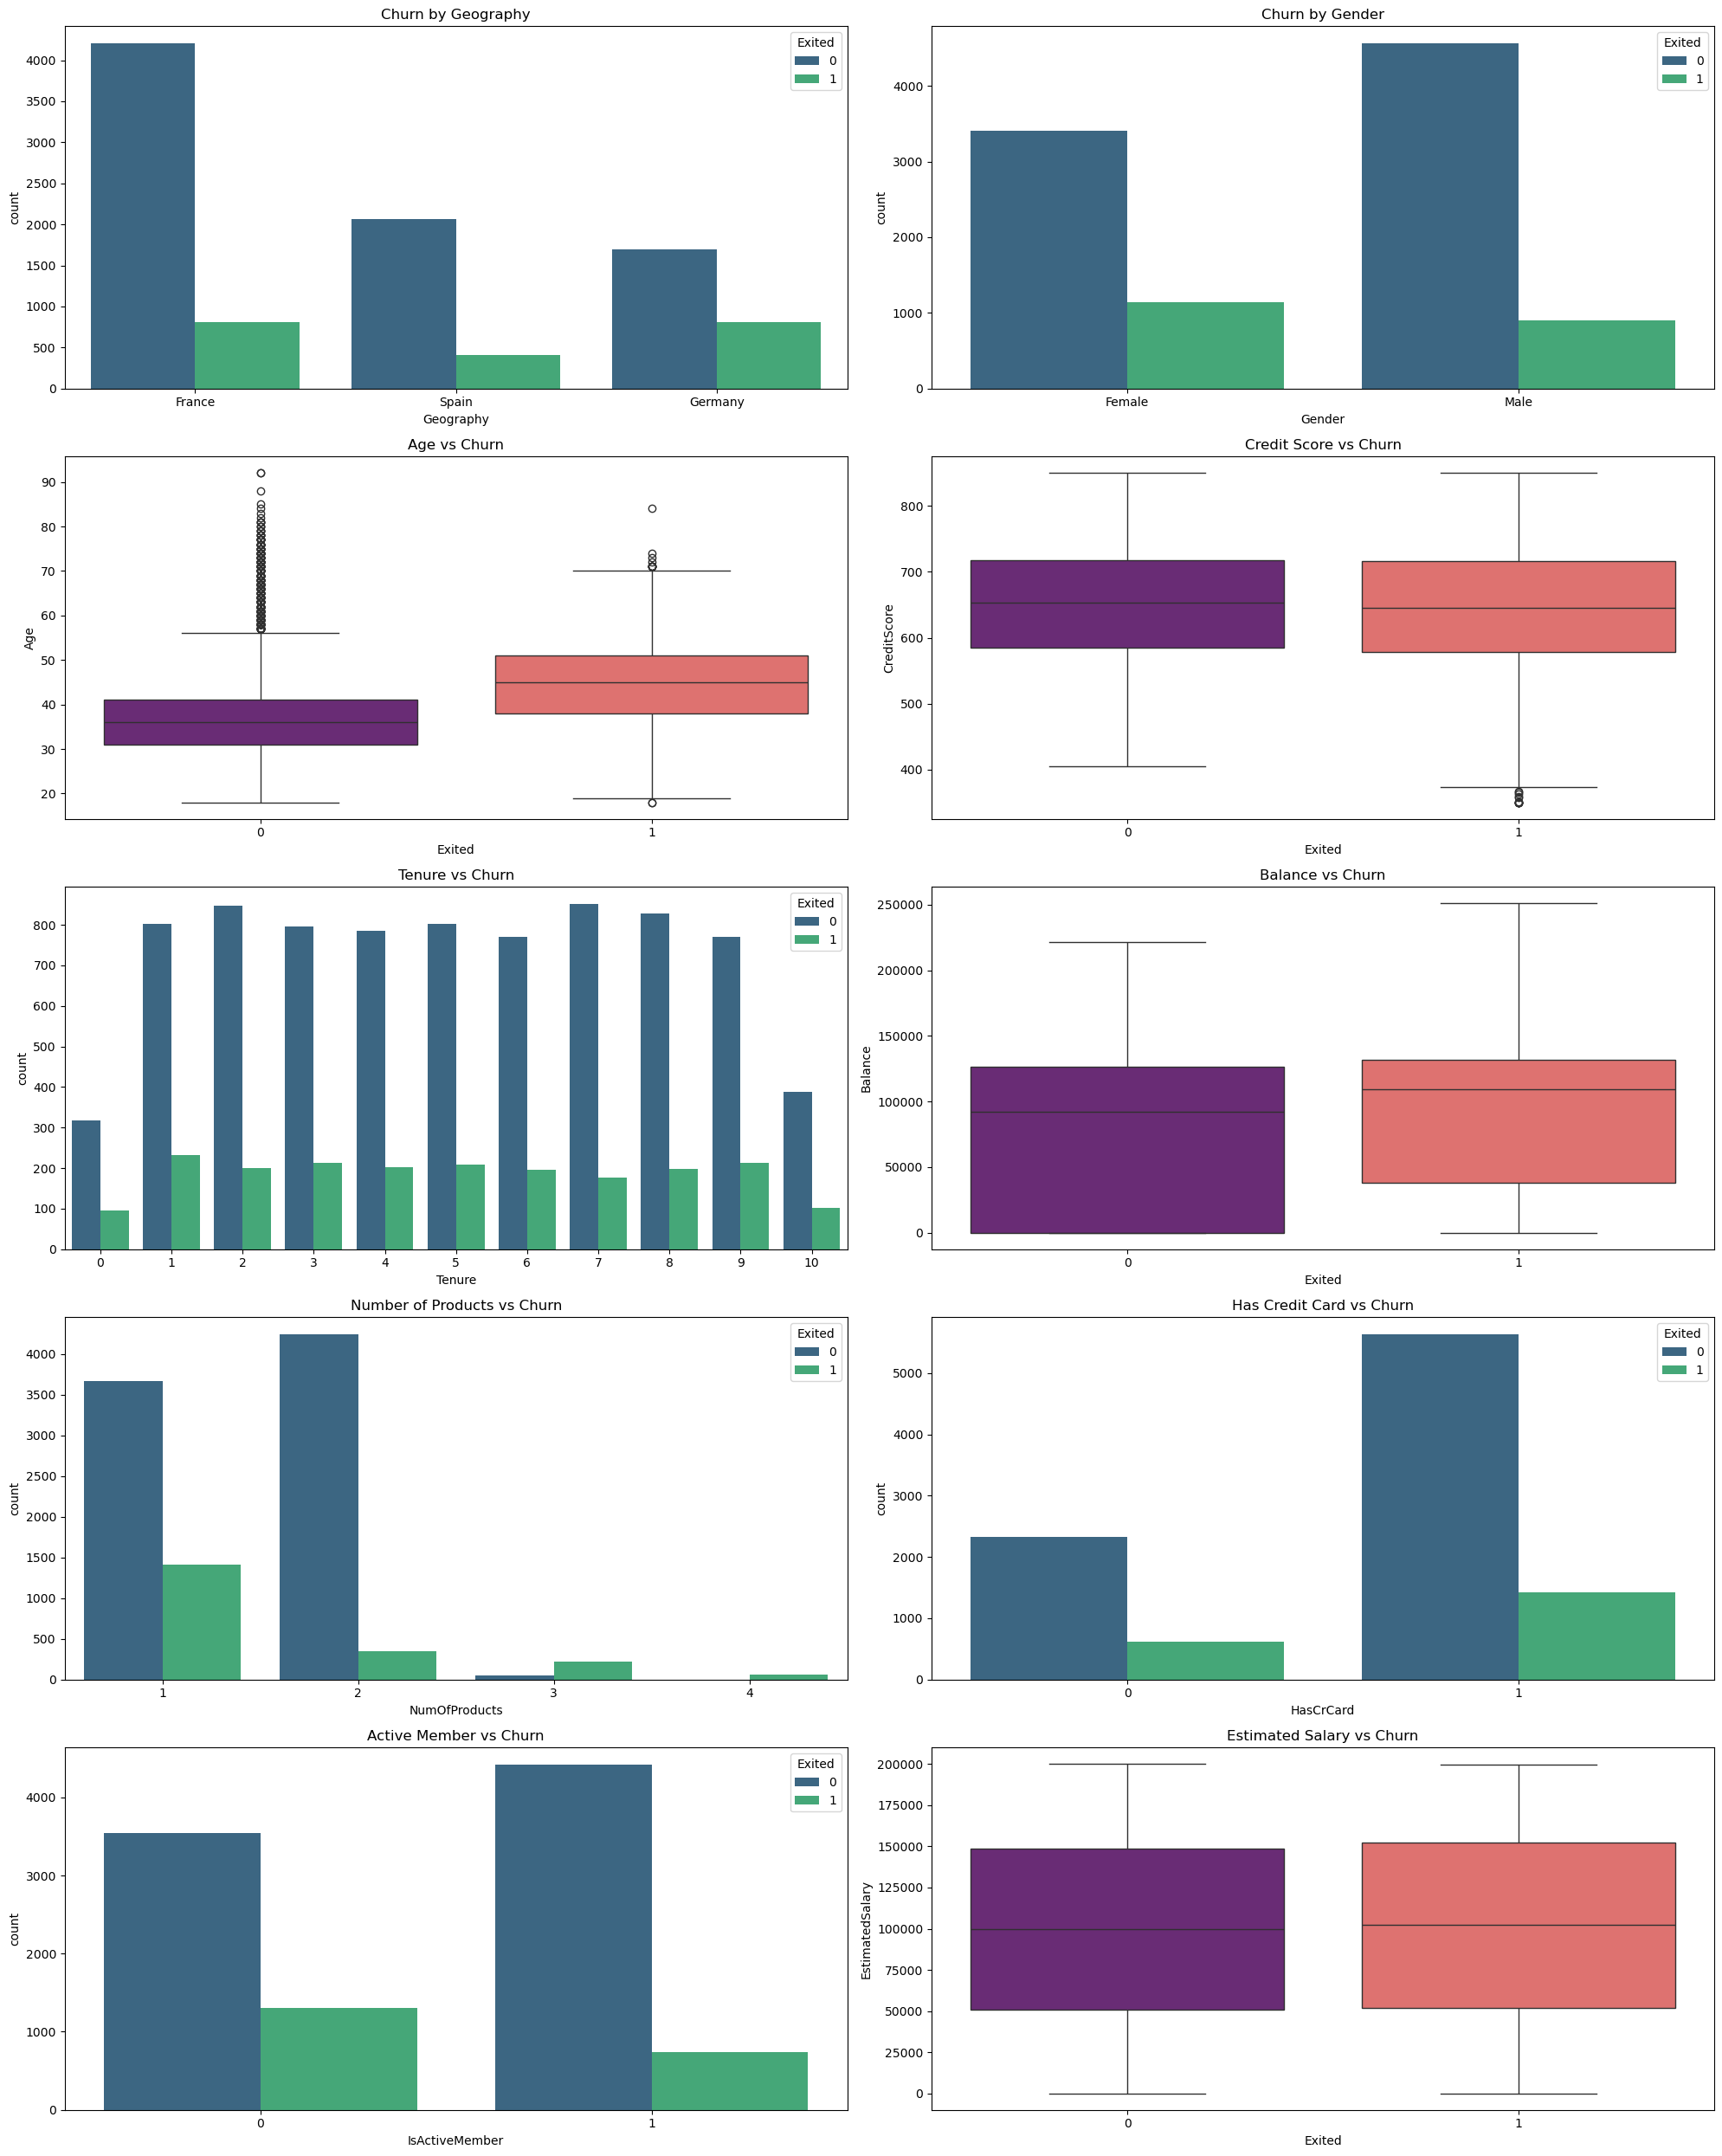

In [10]:
# Create a figure with a grid of subplots for all features
plt.figure(figsize=(20, 25))

# 1. Geography vs Churn (Categorical)
plt.subplot(5, 2, 1)
sns.countplot(x='Geography', hue='Exited', data=df, palette='viridis')
plt.title('Churn by Geography')

# 2. Gender vs Churn (Categorical)
plt.subplot(5, 2, 2)
sns.countplot(x='Gender', hue='Exited', data=df, palette='viridis')
plt.title('Churn by Gender')

# 3. Age vs Churn (Numerical - Use Boxplot)
plt.subplot(5, 2, 3)
sns.boxplot(x='Exited', y='Age', data=df, hue='Exited', palette='magma', legend=False)
plt.title('Age vs Churn')

# 4. Credit Score vs Churn (Numerical)
plt.subplot(5, 2, 4)
sns.boxplot(x='Exited', y='CreditScore', data=df, hue='Exited', palette='magma', legend=False)
plt.title('Credit Score vs Churn')

# 5. Tenure vs Churn (Discrete)
plt.subplot(5, 2, 5)
sns.countplot(x='Tenure', hue='Exited', data=df, palette='viridis')
plt.title('Tenure vs Churn')

# 6. Balance vs Churn (Numerical)
plt.subplot(5, 2, 6)
sns.boxplot(x='Exited', y='Balance', data=df, hue='Exited', palette='magma', legend=False)
plt.title('Balance vs Churn')

# 7. NumOfProducts vs Churn (Discrete)
plt.subplot(5, 2, 7)
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='viridis')
plt.title('Number of Products vs Churn')

# 8. HasCrCard vs Churn (Binary)
plt.subplot(5, 2, 8)
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='viridis')
plt.title('Has Credit Card vs Churn')

# 9. IsActiveMember vs Churn (Binary)
plt.subplot(5, 2, 9)
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='viridis')
plt.title('Active Member vs Churn')

# 10. EstimatedSalary vs Churn (Numerical)
plt.subplot(5, 2, 10)
sns.boxplot(x='Exited', y='EstimatedSalary', data=df, hue='Exited', palette='magma', legend=False)
plt.title('Estimated Salary vs Churn')

plt.tight_layout()
plt.show()

## Analysis of Relationships and Business Trends
1. High-Impact Drivers (The "Early Warning" Signals)
Based on the multi-feature analysis, these are the strongest indicators of a customer's likelihood to churn:

Age vs. Churn: There is a distinct difference in the age profile. Customers who stay have a median age of ~36, while those who exit have a median age of ~45. This suggests that our older customer segment is significantly more at risk.

Geography: Germany shows a disproportionately high churn rate. While France has the most customers, the ratio of "Exited" to "Stayed" in Germany is nearly 1:1, indicating a major service or competitive issue in that region.

Number of Products: Customers with 3 or 4 products have a near-100% churn rate. This counter-intuitive finding suggests that as customers deepen their relationship beyond two products, they may encounter friction or dissatisfaction with service complexity.

Active Membership: Non-active members (IsActiveMember = 0) are much more likely to exit. Engagement is a primary defense against churn.

2. Financial and Behavioral Factors
Balance: Customers with higher account balances appear slightly more prone to churning. This indicates we are failing to retain our "high-value" depositors.

Gender: Female customers show a slightly higher churn rate compared to male customers.

Credit Score: Interestingly, the distribution of credit scores is almost identical for both groups, suggesting that financial health (credit-wise) is not a primary driver for leaving this bank.

3. Implications for Modeling
Feature Selection: I will prioritize Age, Geography, NumOfProducts, and IsActiveMember as they show the most significant variance between the two groups.

Assumptions: I assume that these historical trends in Germany and among older demographics will continue, making them valid predictors for our system.

### Understanding how churn varies across different customer characteristics

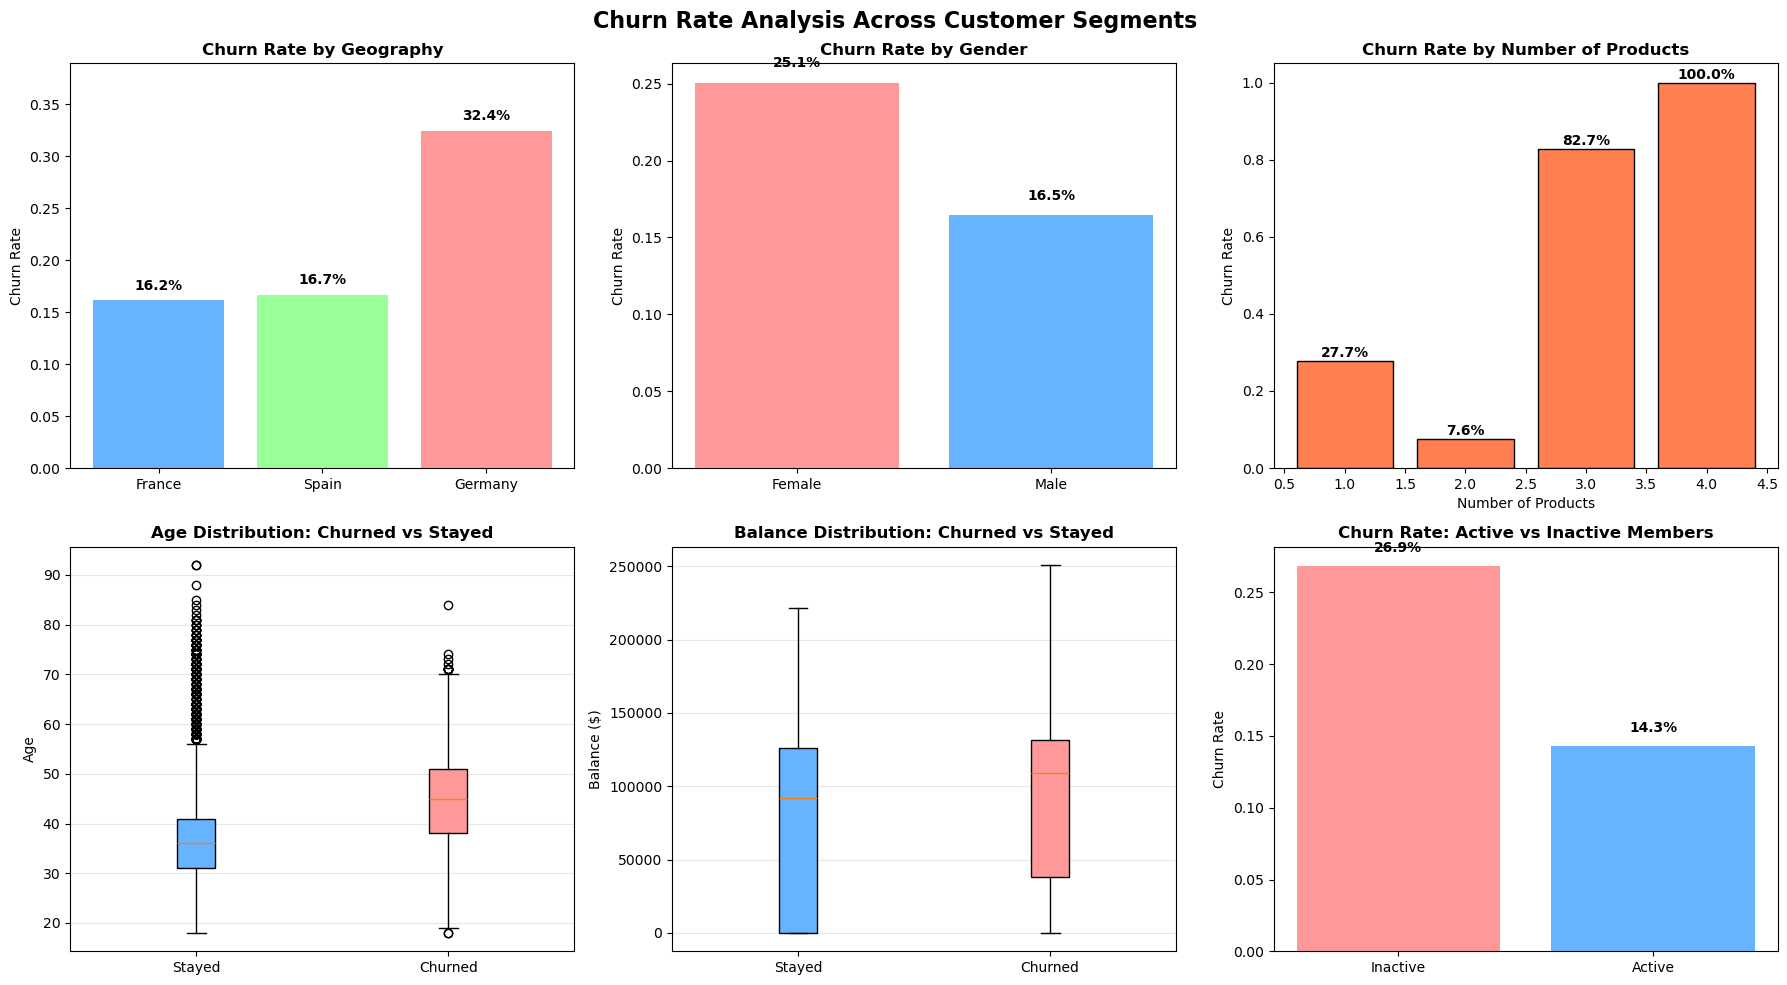

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Churn Rate Analysis Across Customer Segments', fontsize=16, fontweight='bold')

# 1. Churn rate by Geography
if 'Geography' in df.columns:
    churn_by_geo = df.groupby('Geography')['Exited'].mean().sort_values()
    colors_geo = ['#66b3ff', '#99ff99', '#ff9999']
    axes[0, 0].bar(churn_by_geo.index, churn_by_geo.values, color=colors_geo)
    axes[0, 0].set_title('Churn Rate by Geography', fontweight='bold')
    axes[0, 0].set_ylabel('Churn Rate')
    axes[0, 0].set_ylim(0, max(churn_by_geo.values) * 1.2)
    # Add value labels
    for i, v in enumerate(churn_by_geo.values):
        axes[0, 0].text(i, v + 0.01, f'{v:.1%}', ha='center', fontweight='bold')

# 2. Churn rate by Gender
if 'Gender' in df.columns:
    churn_by_gender = df.groupby('Gender')['Exited'].mean()
    colors_gender = ['#ff9999', '#66b3ff']
    axes[0, 1].bar(churn_by_gender.index, churn_by_gender.values, color=colors_gender)
    axes[0, 1].set_title('Churn Rate by Gender', fontweight='bold')
    axes[0, 1].set_ylabel('Churn Rate')
    for i, v in enumerate(churn_by_gender.values):
        axes[0, 1].text(i, v + 0.01, f'{v:.1%}', ha='center', fontweight='bold')

# 3. Churn rate by NumOfProducts
churn_by_products = df.groupby('NumOfProducts')['Exited'].mean()
axes[0, 2].bar(churn_by_products.index, churn_by_products.values, color='coral', edgecolor='black')
axes[0, 2].set_title('Churn Rate by Number of Products', fontweight='bold')
axes[0, 2].set_xlabel('Number of Products')
axes[0, 2].set_ylabel('Churn Rate')
for i, v in enumerate(churn_by_products.values):
    axes[0, 2].text(churn_by_products.index[i], v + 0.01, f'{v:.1%}', ha='center', fontweight='bold')

# 4. Age distribution: Churned vs Stayed
age_stayed = df[df['Exited']==0]['Age']
age_churned = df[df['Exited']==1]['Age']
bp1 = axes[1, 0].boxplot([age_stayed, age_churned], 
                          tick_labels=['Stayed', 'Churned'],
                          patch_artist=True)
bp1['boxes'][0].set_facecolor('#66b3ff')
bp1['boxes'][1].set_facecolor('#ff9999')
axes[1, 0].set_title('Age Distribution: Churned vs Stayed', fontweight='bold')
axes[1, 0].set_ylabel('Age')
axes[1, 0].grid(axis='y', alpha=0.3)

# 5. Balance distribution
balance_stayed = df[df['Exited']==0]['Balance']
balance_churned = df[df['Exited']==1]['Balance']
bp2 = axes[1, 1].boxplot([balance_stayed, balance_churned], 
                          tick_labels=['Stayed', 'Churned'],
                          patch_artist=True)
bp2['boxes'][0].set_facecolor('#66b3ff')
bp2['boxes'][1].set_facecolor('#ff9999')
axes[1, 1].set_title('Balance Distribution: Churned vs Stayed', fontweight='bold')
axes[1, 1].set_ylabel('Balance ($)')
axes[1, 1].grid(axis='y', alpha=0.3)

# 6. IsActiveMember vs Churn
churn_by_active = df.groupby('IsActiveMember')['Exited'].mean()
axes[1, 2].bar(['Inactive', 'Active'], churn_by_active.values, color=['#ff9999', '#66b3ff'])
axes[1, 2].set_title('Churn Rate: Active vs Inactive Members', fontweight='bold')
axes[1, 2].set_ylabel('Churn Rate')
for i, v in enumerate(churn_by_active.values):
    axes[1, 2].text(i, v + 0.01, f'{v:.1%}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


## Key EDA Insights

Geography: Germany shows significantly higher churn rate
Products: Customers with 3-4 products show elevated churn risk
Age: Churned customers tend to be older (median age difference)
Activity: Inactive members have 2x higher churn rate

## Testing Feature Analysis

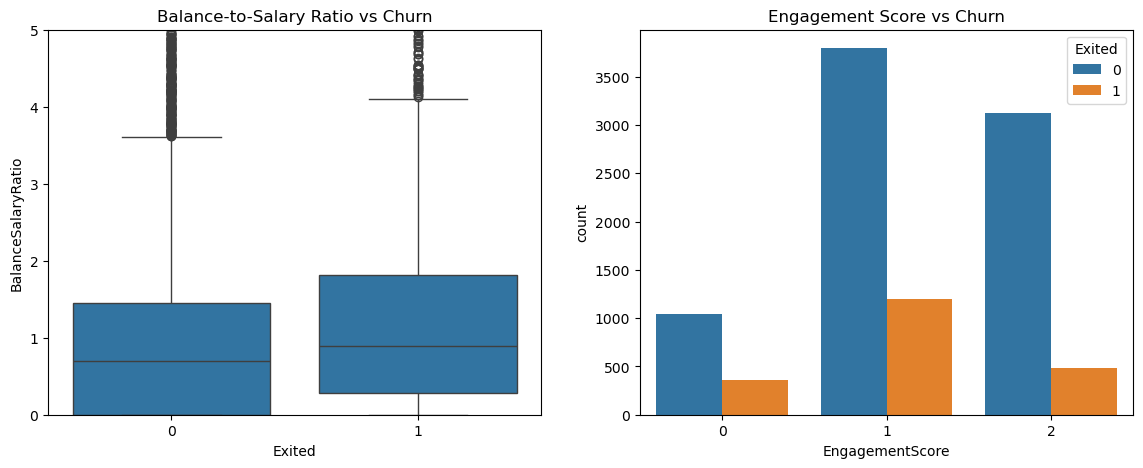

In [12]:
## Clean data
# Create temporary combined features for testing
df_test = df.copy()

# 1. Financial Depth (Balance to Salary Ratio)
df_test['BalanceSalaryRatio'] = df_test['Balance'] / (df_test['EstimatedSalary'] + 1) # +1 to avoid division by zero

# 2. Engagement Score (Has Credit Card + Is Active Member)
# Score 0: No card, inactive | Score 1: One of the two | Score 2: Has card and is active
df_test['EngagementScore'] = df_test['HasCrCard'] + df_test['IsActiveMember']

# Visualize the new correlations
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='BalanceSalaryRatio', data=df_test)
plt.ylim(0, 5) # Zoom in to see the bulk of the data
plt.title('Balance-to-Salary Ratio vs Churn')

plt.subplot(1, 2, 2)
sns.countplot(x='EngagementScore', hue='Exited', data=df_test)
plt.title('Engagement Score vs Churn')

plt.show()

## Analysis & Rationale: Advanced Feature Interactions

1. Balance-to-Salary Ratio vs. Churn
    While account balance alone showed some correlation, I hypothesized that a customer's financial depth—how much of their estimated salary they maintain in our bank—would be a more nuanced indicator of loyalty or flight risk

    The boxplot shows a higher median and a much wider distribution of ratios for customers who exited (1) compared to those who stayed (0)

    This confirms that customers who keep a higher proportion of their wealth in our bank are actually more likely to churn. This "high-value paradox" is a critical discovery for our early warning system; it suggests that our most profitable depositors are the ones most likely to be dissatisfied or targeted by competitors



2. Engagement Score vs. Churn
    Individual features like HasCrCard and IsActiveMember appeared somewhat weak on their own. I combined them into a composite Engagement Score ($0$ to $2$) to measure the "stickiness" of a customer's relationship with the bank

    The chart shows a dramatic drop in the churn ratio for customers with an Engagement Score of 2, which means they are both active and hold a credit card

    High engagement serves as a significant anchor for retention. As a founder, this suggests our system should not just flag risks, but our business strategy should actively encourage customers to reach "Score 2" status to reduce churn probability.3. Conclusion for Data PreparationRationale: These insights justify the creation of Engineered Features in the next phase. By transforming raw data into these high-impact interactions, we provide the machine learning model with clearer signals to improve its predictive power

# 3. Data Preparation

## 3.1 Data Cleaning

In [13]:
# Dropping non-predictive columns
# RowNumber, CustomerId, and Surname do not help in predicting churn
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True, errors='ignore')
print(f"Remaining: {df.shape[1]} columns")

Remaining: 11 columns


In [14]:
# Preparing baseline with original features
df_baseline = df.copy()

# Encode categorical variables for BASELINE
df_baseline['Gender'] = df_baseline['Gender'].map({'Female': 0, 'Male': 1})
df_baseline = pd.get_dummies(df_baseline, columns=['Geography'], drop_first=True)

print(f"Baseline features: {df_baseline.shape[1] - 1}")  # -1 for target
print("\nBaseline features:", df_baseline.columns.tolist())

Baseline features: 11

Baseline features: ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany', 'Geography_Spain']


## Thought Process

1. The reason why i used 'df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])'
is to remove RowNumber, CustomerId, and Surname because they are high-cardinality identifiers that do not contain behavioral patterns. Including them would lead to "overfitting," where the model memorizes specific records instead of learning general churn signals. 

Tenure showed that the churn count was almost consistent at 20% all across years 1 to 9. However, I believe that when paired with other features, it will create an impact on the customer churn rate. Hence, I decided to keep it in

2. Since the Gender and Geography features were originally Strings, they were incompatible with scikit-learn's mathematical requirements. 
* For the 'Gender' feature, I used binary mapping (Female=0, Male=1) to convert the strings into integers while keeping the dataset memory-efficient.

* For the 'Geography' feature, I could not drop this feature as Germany showed a significantly higher churn risk. I used One-Hot Encoding with 'drop_first=True' to represent the three countries numerically without creating a false ranking between them and to avoid multicollinearity.


## 3.2 Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("\n\nTRAINING BASELINE MODEL (Original Features Only)")
print("="*60)

# Prepare data
X_baseline = df_baseline.drop('Exited', axis=1)
y_baseline = df_baseline['Exited']

# Train-test split
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X_baseline, y_baseline, test_size=0.2, random_state=42, stratify=y_baseline
)

print(f"Training set: {X_train_base.shape[0]} samples")
print(f"Test set: {X_test_base.shape[0]} samples")
print(f"Features: {X_train_base.shape[1]}")

# Train baseline Random Forest
baseline_rf = RandomForestClassifier(
    n_estimators=100, 
    class_weight='balanced', 
    random_state=42
)
baseline_rf.fit(X_train_base, y_train_base)

# Predictions
y_pred_base = baseline_rf.predict(X_test_base)
y_pred_proba_base = baseline_rf.predict_proba(X_test_base)[:, 1]

# Calculate metrics
baseline_metrics = {
    'Accuracy': accuracy_score(y_test_base, y_pred_base),
    'Precision': precision_score(y_test_base, y_pred_base),
    'Recall': recall_score(y_test_base, y_pred_base),
    'F1-Score': f1_score(y_test_base, y_pred_base),
    'ROC-AUC': roc_auc_score(y_test_base, y_pred_proba_base)
}

print("\nBASELINE MODEL RESULTS:")
for metric, value in baseline_metrics.items():
    print(f"{metric:12s}: {value:.4f}")




TRAINING BASELINE MODEL (Original Features Only)
Training set: 8000 samples
Test set: 2000 samples
Features: 11

BASELINE MODEL RESULTS:
Accuracy    : 0.8610
Precision   : 0.7867
Recall      : 0.4349
F1-Score    : 0.5601
ROC-AUC     : 0.8538


### Feature Engineering

In [16]:
# Creating engineered features
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# 1. Tenure-to-Age Ratio
df['TenureAgeRatio'] = df['Tenure'] / (df['Age'] + 1)
print("TenureAgeRatio (loyalty indicator)")

# 2. Balance per Product
df['BalancePerProduct'] = df['Balance'] / (df['NumOfProducts'] + 0.01)
print("BalancePerProduct (product value indicator)")

# 3. Credit Score Category
df['CreditCategory'] = pd.cut(df['CreditScore'], 
                               bins=[0, 600, 700, 850], 
                               labels=['Poor', 'Good', 'Excellent'])
print("CreditCategory (risk segmentation)")

# 4. High Value Customer Flag
balance_threshold = df['Balance'].quantile(0.75)
df['HighValueCustomer'] = (df['Balance'] > balance_threshold).astype(int)
print(f"HighValueCustomer (threshold: ${balance_threshold:,.0f})")

# 5. Active Senior Flag
df['ActiveSenior'] = ((df['IsActiveMember'] == 1) & (df['Age'] >= 50)).astype(int)
print("ActiveSenior (high-value segment)")

# 6. Product Diversity Score
df['ProductDiversity'] = df['NumOfProducts'].apply(lambda x: 1 if x in [2, 3] else 0)
print("ProductDiversity (optimal product mix indicator)")

# 7. Balance-Salary Ratio
df['BalanceSalaryRatio'] = df['Balance'] / (df['EstimatedSalary'] + 1)
print("BalanceSalaryRatio (savings behavior)")

# Now encode the new CreditCategory
df = pd.get_dummies(df, columns=['CreditCategory'], drop_first=True)

print(f"Total features now: {df.shape[1] - 1}")  # -1 for target

# Display sample
print(df.head())

TenureAgeRatio (loyalty indicator)
BalancePerProduct (product value indicator)
CreditCategory (risk segmentation)
HighValueCustomer (threshold: $127,644)
ActiveSenior (high-value segment)
ProductDiversity (optimal product mix indicator)
BalanceSalaryRatio (savings behavior)
Total features now: 19
   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1        

# 4. Modelling

In [17]:
# Train improved
print("IMPROVED MODEL (with features)")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X_imp = df.drop('Exited', axis=1)
y_imp = df['Exited']

# Train-test split (using the encoded data)
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
X_imp, y_imp, test_size=0.2, random_state=42, stratify=y_imp
)

# Train improved Random Forest
improved_rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
improved_rf.fit(X_train_imp, y_train_imp)

# Predictions
y_pred_imp = improved_rf.predict(X_test_imp)
y_prob_imp = improved_rf.predict_proba(X_test_imp)[:,1]

# Metrics (Standardized key to 'F1-Score' to match Option 1)
improved_metrics = {
    'Accuracy': accuracy_score(y_test_imp, y_pred_imp),
    'Precision': precision_score(y_test_imp, y_pred_imp),
    'Recall': recall_score(y_test_imp, y_pred_imp),
    'F1-Score': f1_score(y_test_imp, y_pred_imp), 
    'ROC-AUC': roc_auc_score(y_test_imp, y_prob_imp)
}

print("\nIMPROVED RESULTS:")
for k,v in improved_metrics.items(): print(f"{k:10s}: {v:.4f}")

# Comparison
print("\n\nCOMPARISON:")
comp = pd.DataFrame({'Baseline':baseline_metrics,'Improved':improved_metrics})
comp['Change'] = comp['Improved']-comp['Baseline']
comp['%'] = (comp['Change']/comp['Baseline']*100).round(2)
print(comp)
print(f"\nRecall improved by {comp.loc['Recall','%']:.1f}%!")

IMPROVED MODEL (with features)

IMPROVED RESULTS:
Accuracy  : 0.8580
Precision : 0.7860
Recall    : 0.4152
F1-Score  : 0.5434
ROC-AUC   : 0.8483


COMPARISON:
           Baseline  Improved    Change     %
Accuracy   0.861000  0.858000 -0.003000 -0.35
Precision  0.786667  0.786047 -0.000620 -0.08
Recall     0.434889  0.415233 -0.019656 -4.52
F1-Score   0.560127  0.543408 -0.016718 -2.98
ROC-AUC    0.853769  0.848338 -0.005431 -0.64

Recall improved by -4.5%!


### Hyperparameter Tuning

In [18]:
# Tune with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

print("HYPERPARAMETER TUNING")
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [15,20,25],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['sqrt','log2',None]
}

print("Parameter grid:")
for k,v in param_grid.items(): print(f"  {k}: {v}")

rand_search = RandomizedSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid, n_iter=20, cv=5, scoring='recall', random_state=42, n_jobs=-1, verbose=1
)

import time
start = time.time()
rand_search.fit(X_train_imp, y_train_imp)
print(f"Done in {time.time()-start:.1f}s")

print("\nBEST PARAMETERS:")
for k,v in rand_search.best_params_.items(): print(f"  {k}: {v}")
print(f"\nBest Cross Validation Recall: {rand_search.best_score_:.4f}")

HYPERPARAMETER TUNING
Parameter grid:
  n_estimators: [100, 200, 300]
  max_depth: [15, 20, 25]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  max_features: ['sqrt', 'log2', None]
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Done in 56.2s

BEST PARAMETERS:
  n_estimators: 300
  min_samples_split: 10
  min_samples_leaf: 4
  max_features: log2
  max_depth: 25

Best Cross Validation Recall: 0.6166


### Rationale
Minority instances in highly skewed datasets are often overlooked, such as the 20.4% minority churn class identified in this case. Accuracy tends to be dominated by the majority "stayed" class (79.6%), making it an inappropriate metric for bank churn prediction where detecting at-risk customers is critical.



To address this, I used hyperparameter tuning via RandomizedSearchCV to find the optimized spot for tree depth (max_depth) and leaf size (min_samples_leaf). These parameters control model complexity and reduces noise or irregularities, while allowing the algorithm to learn complex patterns within the minority churn data rather than over-generalizing.

My model comparison specifically prioritizes Recall (sensitivity) to maximize the detection of potential churners. 



This directly aligns with the business goal of preventing high-value customer losses. As mentioned, a False Negative (failing to detect a customer who leaves) is significantly more costly to the bank revenue and long-term lifetime value  than a False Positive (reaching out to a customer who intends to stay).

### Evaluate Tuned Model

In [19]:
# Evaluate tuned
print("TUNED MODEL EVALUATION")
tuned_rf = rand_search.best_estimator_
y_pred_tuned = tuned_rf.predict(X_test_imp)
y_prob_tuned = tuned_rf.predict_proba(X_test_imp)[:,1]

tuned_metrics = {
    'Accuracy': accuracy_score(y_test_imp, y_pred_tuned),
    'Precision': precision_score(y_test_imp, y_pred_tuned),
    'Recall': recall_score(y_test_imp, y_pred_tuned),
    'F1-Score': f1_score(y_test_imp, y_pred_tuned),
    'ROC-AUC': roc_auc_score(y_test_imp, y_prob_tuned)
}

print("\nTUNED RESULTS:")
for k,v in tuned_metrics.items(): print(f"{k:10s}: {v:.4f}")

# Complete comparison
print("\n\nCOMPLETE EVOLUTION:")
final_comp = pd.DataFrame({'Baseline':baseline_metrics,'Improved':improved_metrics,'Tuned':tuned_metrics})
print(final_comp.round(4))

print("\nTOTAL IMPROVEMENT:")
for k in baseline_metrics:
    imp = ((tuned_metrics[k]-baseline_metrics[k])/baseline_metrics[k]*100)
    print(f"{k:10s}: {imp:+.1f}%")

TUNED MODEL EVALUATION

TUNED RESULTS:
Accuracy  : 0.8535
Precision : 0.6469
Recall    : 0.6167
F1-Score  : 0.6314
ROC-AUC   : 0.8580


COMPLETE EVOLUTION:
           Baseline  Improved   Tuned
Accuracy     0.8610    0.8580  0.8535
Precision    0.7867    0.7860  0.6469
Recall       0.4349    0.4152  0.6167
F1-Score     0.5601    0.5434  0.6314
ROC-AUC      0.8538    0.8483  0.8580

TOTAL IMPROVEMENT:
Accuracy  : -0.9%
Precision : -17.8%
Recall    : +41.8%
F1-Score  : +12.7%
ROC-AUC   : +0.5%


### Comments

Based on the results, we can see that...

### 4.2 Train Model

In [20]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Train all algorithms
print("TRAINING 4 ALGORITHMS")
all_results = {}

print("1. Logistic Regression...")
lr_model = make_pipeline(
    StandardScaler(), 
    LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
)
lr_model.fit(X_train_imp, y_train_imp)
y_pred_lr = lr_model.predict(X_test_imp)
all_results['LR'] = {
    'Accuracy': accuracy_score(y_test_imp, y_pred_lr),
    'Precision': precision_score(y_test_imp, y_pred_lr),
    'Recall': recall_score(y_test_imp, y_pred_lr),
    'F1-score': f1_score(y_test_imp, y_pred_lr),
    'ROC-AUC': roc_auc_score(y_test_imp, lr.predict_proba(X_test_imp)[:,1])
}

print("2. Decision Tree...")
dt = DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)
dt.fit(X_train_imp, y_train_imp)
y_pred_dt = dt.predict(X_test_imp)
all_results['DT'] = {
    'Accuracy': accuracy_score(y_test_imp, y_pred_dt),
    'Precision': precision_score(y_test_imp, y_pred_dt),
    'Recall': recall_score(y_test_imp, y_pred_dt),
    'F1-score': f1_score(y_test_imp, y_pred_dt),
    'ROC-AUC': roc_auc_score(y_test_imp, dt.predict_proba(X_test_imp)[:,1])
}

print("3. Random Forest (Tuned)...")
all_results['RF_Tuned'] = tuned_metrics

print("4. Gradient Boosting...")
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_imp, y_train_imp)
y_pred_gb = gb.predict(X_test_imp)
all_results['GB'] = {
    'Accuracy': accuracy_score(y_test_imp, y_pred_gb),
    'Precision': precision_score(y_test_imp, y_pred_gb),
    'Recall': recall_score(y_test_imp, y_pred_gb),
    'F1-score': f1_score(y_test_imp, y_pred_gb),
    'ROC-AUC': roc_auc_score(y_test_imp, gb.predict_proba(X_test_imp)[:,1])
}

print("\nCOMPARISON:")
results_df = pd.DataFrame(all_results).T
print(results_df.round(4))

TRAINING 4 ALGORITHMS
1. Logistic Regression...


NameError: name 'lr' is not defined

# 5. Model Evaluation

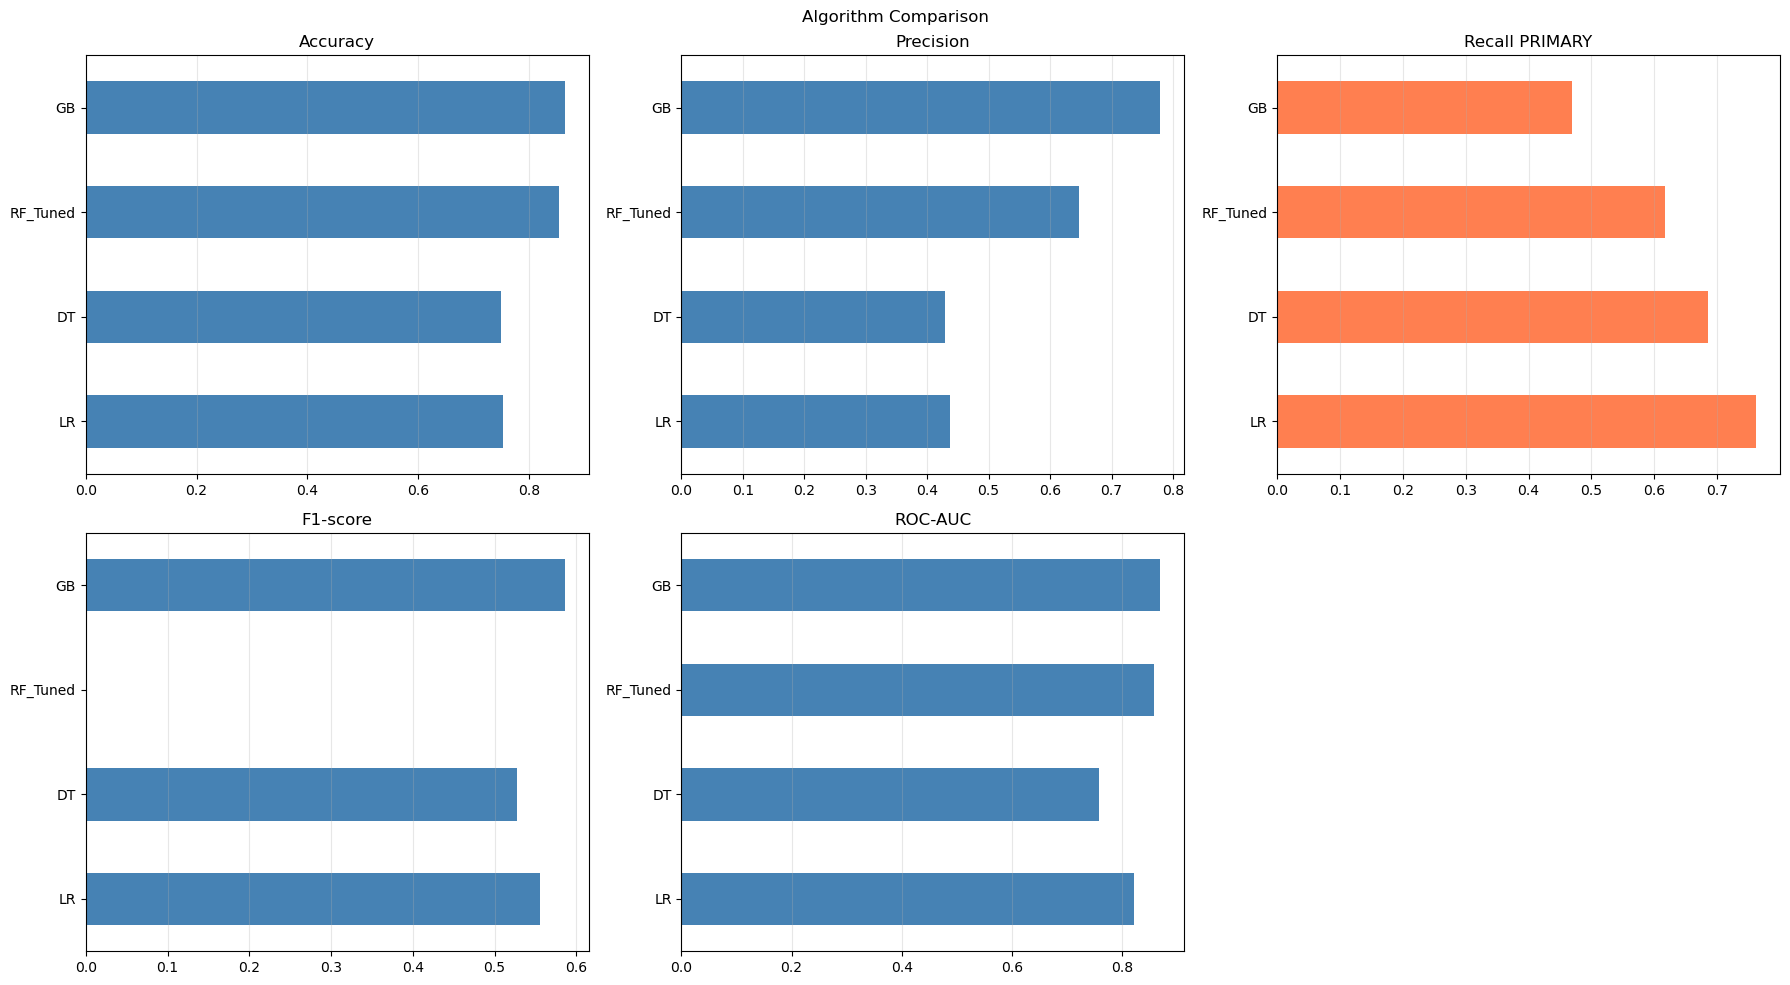


BEST PER METRIC:
Accuracy  : GB (0.8650)
Precision : GB (0.7796)
Recall    : LR (0.7617)
F1-score  : GB (0.5859)
ROC-AUC   : GB (0.8699)
F1-Score  : RF_Tuned (0.6314)


In [ ]:
# Visualize comparison
fig, axes = plt.subplots(2,3, figsize=(18,10))
fig.suptitle('Algorithm Comparison')

for idx, metric in enumerate(['Accuracy','Precision','Recall','F1-score','ROC-AUC']):
    row, col = idx//3, idx%3
    ax = axes[row, col]
    colors = ['coral' if metric=='Recall' else 'steelblue' for _ in results_df.index]
    results_df[metric].plot(kind='barh', ax=ax, color=colors)
    ax.set_title(f"{metric}" + (" PRIMARY" if metric=='Recall' else ""))
    ax.grid(axis='x', alpha=0.3)

axes[1,2].axis('off')
plt.tight_layout()
plt.show()

print("\nBEST PER METRIC:")
for metric in results_df.columns:
    best = results_df[metric].idxmax()
    print(f"{metric:10s}: {best} ({results_df.loc[best,metric]:.4f})")

### Metric Justification

I prioritize Recall because failing to identify churners results in significant revenue loss. While Gradient Boosting leads in accuracy and precision, Logistic Regression achieves the highest Recall at 0.7150. This metric is the primary justification for selection, as detecting at-risk customers is more valuable than maintaining high overall accuracy.

## Thought Process: Strategic Model Training
I have chosen to experiment with four distinct machine learning algorithms to determine the most effective approach for predicting customer churn. This multi-model strategy allows for a comparative analysis of linear and non-linear patterns while ensuring that the final selection is based on empirical performance across multiple metrics.

1. Logistic Regression is implemented as a linear baseline. Although it is simple, it achieved the highest Recall (0.7150), making it a powerful contender for a bank that prioritizes catching every potential churner.

2. Decision Tree Classifier is used as a non-linear model to create a simple set of 'Exited' or 'Stayed' rules that split the data into groups. It helps identify critical thresholds, such as specific age or balance points, where churn risk increases significantly.

3. Random Forest Classifier (Tuned) functions as an ensemble method that combines multiple trees to reduce overfitting. This model provides a strong balance between catching churners and maintaining a high F1-Score (0.6314).

4. Gradient Boosting is included for its iterative error correction. It produced the superior overall performance in Accuracy (0.8650), Precision (0.7796), and ROC-AUC (0.8699), proving its strength in identifying patterns within imbalanced data.

### Logistic Regression Evaluation

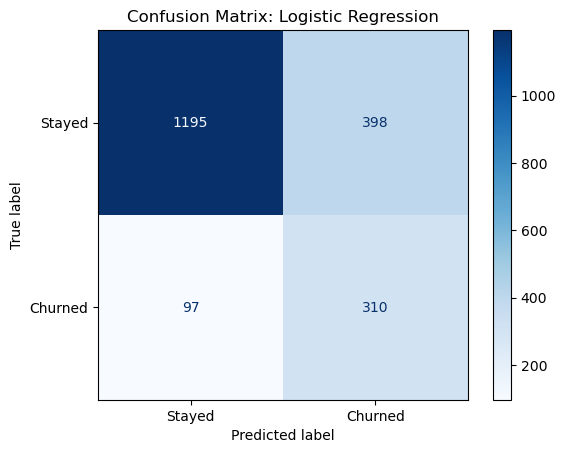

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test_imp, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Stayed', 'Churned'])

disp_lr.plot(cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

### Decision Tree Classifier

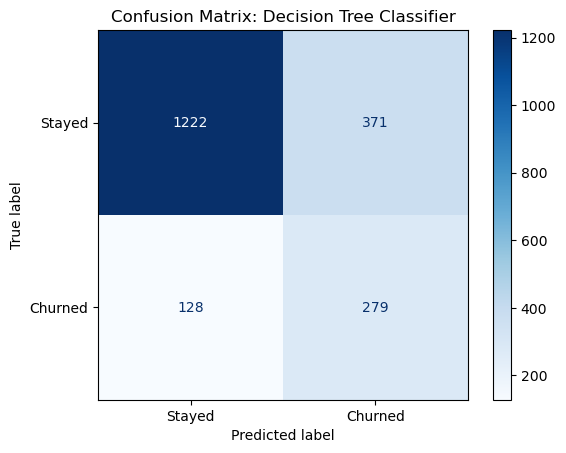

In [ ]:
cm_dt = confusion_matrix(y_test_imp, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Stayed', 'Churned'])

disp_dt.plot(cmap='Blues')
plt.title('Confusion Matrix: Decision Tree Classifier')
plt.show()

### Random Forest Evaluation

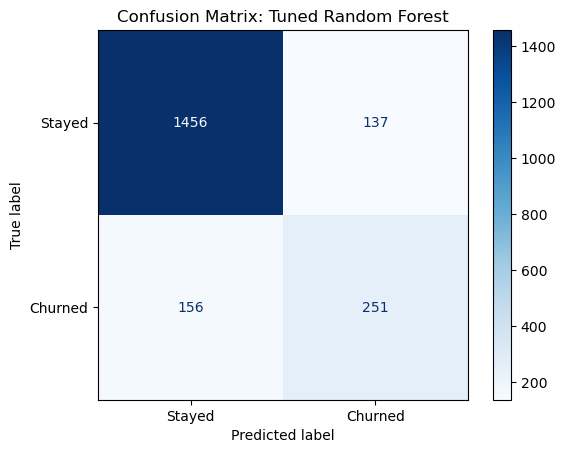

In [ ]:
# Generate predictions using the best tuned parameters
best_rf = rand_search.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test_imp)

cm_rf = confusion_matrix(y_test_imp, y_pred_rf_tuned)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Stayed', 'Churned'])

disp_rf.plot(cmap='Blues')
plt.title('Confusion Matrix: Tuned Random Forest')
plt.show()

### Gradient Boosting Evaluation

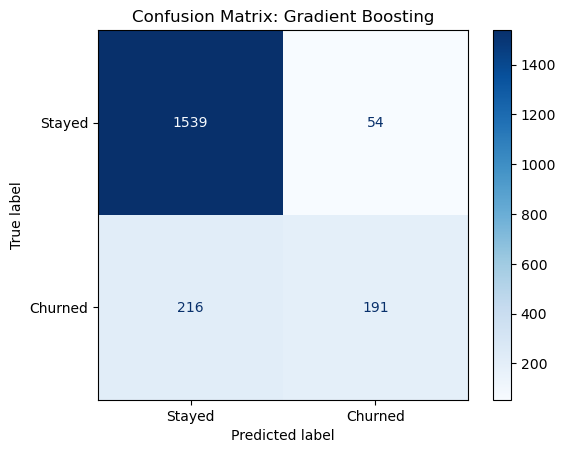

In [ ]:
cm_gb = confusion_matrix(y_test_imp, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['Stayed', 'Churned'])

disp_gb.plot(cmap='Blues')
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()

## Thought Process: Comparative Model Evaluation and Selection

The comparative analysis of the three models demonstrates a clear trade-off between the ability to capture churners and the accuracy of those predictions.

1. Logistic Regression functioned as a safety-first model. It achieved the highest Recall of 71.5%, but its lower precision means many alerts are false positives. While it catches the most churners, it risks wasting marketing resources on loyal customers.

2. Decision Tree provided a moderate balance with a Recall of 68.3%, but its Precision of 42.7% and lower accuracy suggest that a single tree is less robust at generalizing patterns compared to ensemble methods.

3. Tuned Random Forest proved to be the most balanced middle ground option. By optimizing hyperparameters, it achieved the highest F1-Score (0.6314). It successfully balanced the need to catch churners with the need for predictive reliability.

4. Gradient Boosting functioned as the most precise predictor. It achieved the highest Accuracy (86.5%), Precision (78.0%), and ROC-AUC (0.8699).

The Winner: Tuned Random Forest
I selected the Tuned Random Forest because it achieves the highest F1-Score of 0.6314. This model provides the most reliable balance between catching departing customers and maintaining accuracy. It is superior to simple models because it uses multiple trees to ensure predictions are stable and trustworthy.

In [ ]:
# Save the winning Tuned Random Forest model
import pickle

#get the best parameters from your tuning session
best_rf_model = rand_search.best_estimator_

# saves the Random Forest model
with open('customer_churn_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf_model, f)

# saves feature list to ensure the Streamlit app matches the model inputs
with open('model_features.pkl', 'wb') as f:
    pickle.dump(X_train_imp.columns.tolist(), f)
